<a href="https://colab.research.google.com/github/Duncan1738/Solar-Power-Prediction-using-XGBoost-Transformer-Mode/blob/main/Solar_power_XGBOOST_for_1hour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트 사용 in colab 한번 실행하고 런타임 다시 실행
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False


NanumBarunGothic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np

from pandas import DataFrame, Series
from datetime import datetime

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#3년
filename = '/content/drive/MyDrive/[003] [전라남도 강진군 신전면 영관리]-data-2022-02-21 16_08_43.csv'
solar = pd.read_csv(filename)
solar.head(10)

,Time,deviceNum,siteID,acA,acV,capacity,cumulativePower,dailyPower,dcA,dcV,dcKW
0,2019-01-01 07:53:29,1,3,0.4,382.0,97.2,108877.0,0.0,0.2,507.0,0.1
1,2019-01-01 07:58:09,1,3,0.8,382.0,97.2,108877.0,0.0,0.4,523.0,0.2
2,2019-01-01 08:05:09,1,3,1.4,382.0,97.2,108877.0,0.0,0.7,543.0,0.3
3,2019-01-01 08:09:49,1,3,1.6,382.0,97.2,108877.0,0.0,0.7,549.0,0.4
4,2019-01-01 08:14:29,1,3,1.9,382.0,97.2,108877.0,0.0,0.8,552.0,0.4
5,2019-01-01 08:19:09,1,3,2.3,382.0,97.2,108877.0,0.1,0.9,557.0,0.5
6,2019-01-01 08:23:49,1,3,2.3,382.0,97.2,108877.0,0.1,1.0,560.0,0.5
7,2019-01-01 08:28:29,1,3,3.1,382.0,97.2,108877.0,0.2,1.2,564.0,0.7
8,2019-01-01 08:33:09,1,3,2.8,383.0,97.2,108877.0,0.2,1.1,562.0,0.6
9,2019-01-01 08:40:09,1,3,3.5,383.0,97.2,108877.0,0.3,1.4,565.0,0.8


In [ ]:
def str2time(string) :
    # str -> time
    d_result = datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
    return d_result

In [ ]:
# filename = '/content/drive/MyDrive/(003) (전라남도 강진군 신전면 영관리)-data-21-1_12.csv'
# solar = pd.read_csv(filename)
# solar.head()

In [ ]:
# def str2time(string) :
#     # str -> time
#     d_result = datetime.strptime(string, '%Y-%m-%d %H:%M')
#     return d_result

In [ ]:
solar['Time'] = solar['Time'].map(lambda d : str2time(d))
solar = solar.set_index('Time', drop = True)

In [ ]:
## deviceNum = 1에 대해 보간법 실시

# 보간법 사용 X
deviceNum = solar['deviceNum'].unique()
device = []
for n in range(1, len(deviceNum) + 1) :
    # globals() ['device_{}'.format(n)] = solar[solar['deviceNum'] == n].resample('T').first()
    # device.append('device_{}'.format(n))
    # 선형 비례 결측 보간(interpolate : default값 = linear)
    # globals() ['device_{}'.format(n)] = globals() ['device_{}'.format(n)].interpolate()
    globals() ['device_{}'.format(n)] = solar[solar['deviceNum'] == n]
    device.append(globals() ['device_{}'.format(n)])
    print('device_{}'.format(n))

device_1
device_2
device_3
device_4
device_5


In [ ]:
# ## csv 파일들을 DataFrame으로 불러와서 concat(3년)

import os
path = '/content/drive/MyDrive/강진군_ASOS_시간/'
li_file = os.listdir(path)
# 파일명 끝이 .csv인 경우
li_file_py = [file for file in li_file if file.endswith('.csv')]

In [ ]:
## csv 파일들을 DataFrame으로 불러와서 concat

climate = pd.DataFrame()
for c in li_file_py :
    print(c)
    data = pd.read_csv(path + c, encoding = 'euc-kr')
    climate = pd.concat([climate, data])

climate = climate.reset_index(drop = True)

신전면19~20.csv
신전면20~21.csv
신전면21~22.csv
신전면22.csv


In [ ]:
## csv 파일들을 DataFrame으로 불러와서 concat

# climate = pd.read_csv('/content/drive/MyDrive/OBS_ASOS_시간단위.csv', encoding = 'euc-kr')

In [ ]:
climate['일시'] = pd.to_datetime(climate['일시'])
climate = climate.set_index('일시', drop = True).drop('지점명', axis = 1).drop('지점', axis = 1)

In [ ]:
climate = climate.fillna(0)

In [ ]:
climate

,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,-0.1,0.0,0.0,0.0,2.2,0.0,290.0,0.0,58.0,0.0,...,0.0,1918.0,0.0,0.0,-2.7,0.0,1.0,1.4,2.8,3.7
2019-01-01 02:00:00,-0.6,0.0,0.0,0.0,2.2,0.0,360.0,0.0,62.0,0.0,...,4.0,1893.0,0.0,0.0,-3.2,0.0,0.9,1.2,2.8,3.7
2019-01-01 03:00:00,-0.4,0.0,0.0,0.0,2.6,0.0,360.0,0.0,58.0,0.0,...,4.0,1854.0,0.0,0.0,-2.4,0.0,0.9,1.4,3.0,3.9
2019-01-01 04:00:00,-0.2,0.0,0.0,0.0,0.6,0.0,140.0,0.0,63.0,0.0,...,4.0,1683.0,0.0,0.0,-1.7,0.0,0.9,1.3,2.9,3.8
2019-01-01 05:00:00,0.4,0.0,0.0,0.0,1.9,0.0,340.0,0.0,61.0,0.0,...,4.0,1850.0,0.0,0.0,-2.2,0.0,1.0,1.4,2.9,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 20:00:00,1.0,0.0,0.0,0.0,2.7,0.0,290.0,0.0,52.0,0.0,...,0.0,1135.0,0.0,0.0,-1.5,0.0,3.5,4.6,5.5,5.8
2022-01-30 21:00:00,0.8,0.0,0.0,0.0,5.5,0.0,320.0,0.0,54.0,0.0,...,0.0,1238.0,0.0,0.0,-1.5,0.0,3.1,4.3,5.4,6.0
2022-01-30 22:00:00,0.2,0.0,0.0,0.0,2.5,0.0,320.0,0.0,56.0,0.0,...,0.0,1166.0,0.0,0.0,-2.2,0.0,2.8,4.0,5.4,5.9


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()

scaler = scaler.fit_transform(climate)

In [ ]:
climate1 = pd.DataFrame(scaler)

In [ ]:
climate1.columns = climate.columns

In [ ]:
climate1.index = climate.index

In [ ]:
climate1

,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,-1.504447,-0.024061,-0.13559,-0.450605,0.068469,-0.017208,0.780034,-0.017208,-0.644897,-0.068169,...,-0.461551,0.246943,0.0,0.0,-1.742553,-0.027215,-1.590831,-1.590619,-1.580783,-1.574311
2019-01-01 02:00:00,-1.557409,-0.024061,-0.13559,-0.450605,0.068469,-0.017208,1.308374,-0.017208,-0.442190,-0.068169,...,0.278025,0.223696,0.0,0.0,-1.790939,-0.027215,-1.601985,-1.613209,-1.580783,-1.574311
2019-01-01 03:00:00,-1.536224,-0.024061,-0.13559,-0.450605,0.303481,-0.017208,1.308374,-0.017208,-0.644897,-0.068169,...,0.278025,0.187432,0.0,0.0,-1.713521,-0.027215,-1.601985,-1.590619,-1.556161,-1.548791
2019-01-01 04:00:00,-1.515039,-0.024061,-0.13559,-0.450605,-0.871579,-0.017208,-0.352123,-0.017208,-0.391514,-0.068169,...,0.278025,0.028425,0.0,0.0,-1.645781,-0.027215,-1.601985,-1.601914,-1.568472,-1.561551
2019-01-01 05:00:00,-1.451486,-0.024061,-0.13559,-0.450605,-0.107790,-0.017208,1.157419,-0.017208,-0.492867,-0.068169,...,0.278025,0.183712,0.0,0.0,-1.694167,-0.027215,-1.590831,-1.590619,-1.568472,-1.536031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 20:00:00,-1.387932,-0.024061,-0.13559,-0.450605,0.362234,-0.017208,0.780034,-0.017208,-0.948957,-0.068169,...,-0.461551,-0.481141,0.0,0.0,-1.626427,-0.027215,-1.311974,-1.229183,-1.248380,-1.306351
2022-01-30 21:00:00,-1.409116,-0.024061,-0.13559,-0.450605,2.007319,-0.017208,1.006465,-0.017208,-0.847603,-0.068169,...,-0.461551,-0.385365,0.0,0.0,-1.626427,-0.027215,-1.356591,-1.263067,-1.260691,-1.280831
2022-01-30 22:00:00,-1.472670,-0.024061,-0.13559,-0.450605,0.244728,-0.017208,1.006465,-0.017208,-0.746250,-0.068169,...,-0.461551,-0.452315,0.0,0.0,-1.694167,-0.027215,-1.390054,-1.296952,-1.260691,-1.293591


In [ ]:
climate = climate1

In [ ]:
minutes = 60

In [ ]:
li_dev = []
y_col = ['cumulativePower', 'dailyPower']

for idx, num in enumerate(device) :
    data = num.drop('deviceNum', axis = 1).drop('siteID', axis = 1)
    g_dev = [g for n, g in data.groupby(pd.Grouper(freq = 'D'))]

    li_day = []
    for idn, day in enumerate(g_dev) :
        daily = day.resample('T').first().interpolate()
        daily = pd.concat([daily, climate], axis = 1, join = 'inner')
        x_col = set(daily.columns) - set(y_col)
        daily = daily[x_col].resample('H').mean()
        daily['delta_cumulativePower'] = data['cumulativePower'].resample('H').last() - data['cumulativePower'].resample('{}T'.format(minutes)).first()
        daily['delta_dailyPower'] = data['dailyPower'].resample('{}T'.format(minutes)).last() - data['dailyPower'].resample('{}T'.format(minutes)).first()
        daily = daily.drop([daily.index[0], daily.index[-1]])

        li_day.append(daily)

    li_dev.append(li_day)

In [ ]:
li_dev[0][1100]

,적설(cm),지면온도(°C),해면기압(hPa),현상번호(국내식),3시간신적설(cm),증기압(hPa),운형(운형약어),일사 QC플래그,acA,dcV,...,풍향 QC플래그,시정(10m),일사(MJ/m2),acV,지면온도 QC플래그,기온 QC플래그,풍향(16방위),지면상태(지면상태코드),delta_cumulativePower,delta_dailyPower
2022-01-05 09:00:00,-0.078155,-1.297402,0.362954,0.0,0.0,-1.179700,0.0,-0.915024,5.300000,576.000000,...,-0.017208,-0.072930,-0.552864,388.000000,-0.027215,-0.024061,-1.408803,0.0,2.0,1.9
2022-01-05 10:00:00,-0.078155,-1.181275,0.359311,0.0,0.0,-1.237095,0.0,-0.915024,12.100000,580.000000,...,-0.017208,-0.071071,-0.292169,393.000000,-0.027215,-0.024061,-0.578555,0.0,2.0,2.3
2022-01-05 11:00:00,-0.078155,-1.132889,0.355668,0.0,0.0,-1.214137,0.0,-0.915024,10.600000,578.500000,...,-0.017208,0.127920,-0.258165,391.000000,-0.027215,-0.024061,-0.201169,0.0,4.0,3.6
2022-01-05 12:00:00,-0.078155,-0.978054,0.315592,0.0,0.0,-1.202658,0.0,-0.915024,20.566667,572.666667,...,-0.017208,0.020056,-0.076811,395.666667,-0.027215,-0.024061,-1.408803,0.0,5.0,4.6
2022-01-05 13:00:00,-0.078155,-0.852250,0.264586,0.0,0.0,-1.214137,0.0,-0.915024,22.400000,571.000000,...,-0.017208,-0.164057,0.376573,393.000000,-0.027215,-0.024061,-0.050215,0.0,4.0,3.7
2022-01-05 14:00:00,-0.078155,-0.881282,0.231797,0.0,0.0,-1.202658,0.0,-0.915024,15.966667,570.333333,...,-0.017208,-0.178005,0.183885,392.000000,-0.027215,-0.024061,0.629079,0.0,3.0,2.9
2022-01-05 15:00:00,-0.078155,-0.900636,0.231797,0.0,0.0,-1.191179,0.0,-0.915024,8.950000,563.000000,...,-0.017208,-0.306326,-0.110815,391.000000,-0.027215,-0.024061,-0.050215,0.0,1.0,0.9
2022-01-05 16:00:00,-0.078155,-0.978054,0.253656,0.0,0.0,-1.179700,0.0,-0.915024,1.800000,537.000000,...,-0.017208,0.019126,-0.428184,387.000000,-0.027215,-0.024061,0.478125,0.0,0.0,0.2


In [ ]:
for idx, dev in enumerate(li_dev) :
    globals() ['dev{}_{}'.format(idx+1, minutes)] = li_dev[idx]
    print('dev{}_{}'.format(idx+1, minutes))

dev1_60
dev2_60
dev3_60
dev4_60
dev5_60


In [ ]:
## 데이터 없는 날짜 제거
li_num = []
for idx, data in enumerate(dev1_60) :
    if len(data) > 48 :
        li_num.append(idx)

#마지막 데이터 삭제한 데이터 리스트 만들기
delet_last_time = []
for i in range(0, len(dev1_60)) :
  n = len(dev1_60[i])
  if n > 48 :
    pass
    print(i)

  else:
    df1 = dev1_60[i]

    ## 마지막 데이터 제거(30분 단위의 데이터가 있음)
    # df2 = df1.drop(df1.index[len(df1)-1])
    # daily_plot(df2)
    delet_last_time.append(df1)

120
250
251
252
253
254
255
256
257
284
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
871
872
873
1126


8962


Text(0.5, 1.0, '2021-01~2021-12')

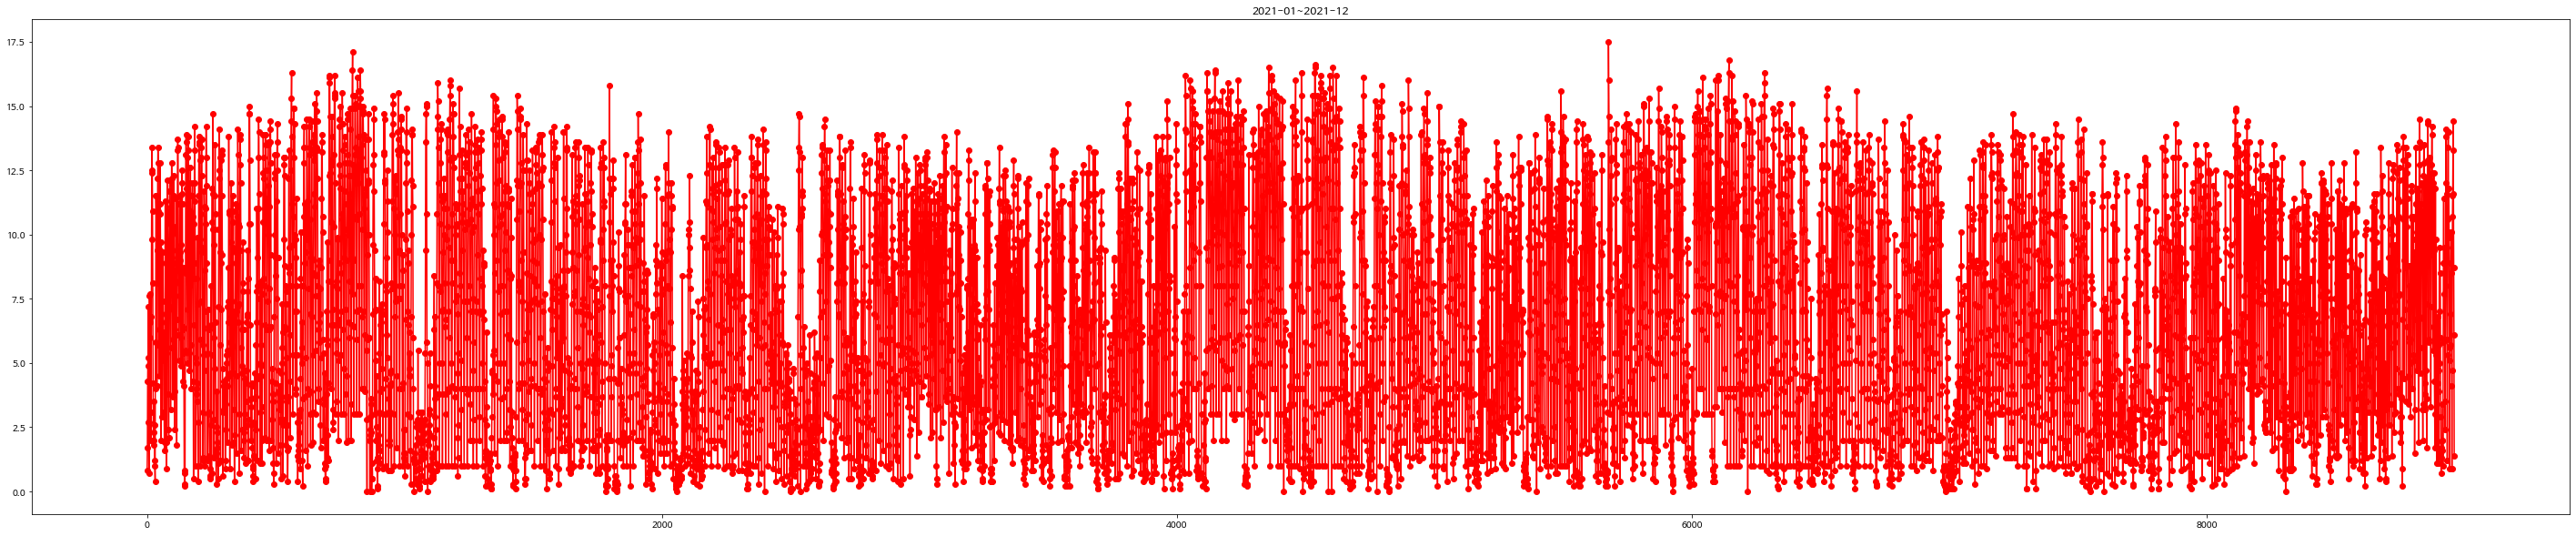

In [ ]:
## 전체 데이터 시각화
from numpy import concatenate
import matplotlib.pyplot as plt
day_df = []
for i in range(0, len(delet_last_time)) :
  n = len(delet_last_time[i])
  if n == 0:
    pass
    print(i)
  else:
   a = delet_last_time[i]['delta_dailyPower']
   day_df = concatenate([day_df , a],axis=0)
  #  day_df.append(a)

df_day = pd.DataFrame(day_df)
df_day.columns = ['delta_dailyPower']
print(len(df_day))
##시각화
plt.figure(figsize = (50, 10))
plt.plot(df_day, 'ro-')
plt.title("2021-01~2021-12")

In [ ]:
delet_last_time[310]

,적설(cm),지면온도(°C),해면기압(hPa),현상번호(국내식),3시간신적설(cm),증기압(hPa),운형(운형약어),일사 QC플래그,acA,dcV,...,풍향 QC플래그,시정(10m),일사(MJ/m2),acV,지면온도 QC플래그,기온 QC플래그,풍향(16방위),지면상태(지면상태코드),delta_cumulativePower,delta_dailyPower
2019-11-17 09:00:00,-0.078155,-0.174846,0.173504,0.0,0.0,-0.031792,0.0,-0.915024,5.080,535.80,...,-0.017208,0.140938,-0.224161,386.80,-0.027215,-0.024061,-1.408803,0.0,1.0,1.2
2019-11-17 10:00:00,-0.078155,-0.116783,0.169861,0.0,0.0,0.037082,0.0,-0.915024,5.525,536.50,...,-0.017208,-0.209621,-0.371511,386.75,-0.027215,-0.024061,-1.408803,0.0,2.0,1.6
2019-11-17 11:00:00,-0.078155,-0.000656,0.151645,0.0,0.0,0.140394,0.0,-0.915024,5.480,534.60,...,-0.017208,-0.338872,-0.439518,384.80,-0.027215,-0.024061,-1.408803,0.0,1.0,1.1
2019-11-17 12:00:00,-0.078155,0.105793,0.133428,0.0,0.0,0.197789,0.0,-0.915024,4.450,530.50,...,-0.017208,-0.346311,-0.439518,385.50,-0.027215,-0.024061,-1.408803,0.0,5.0,4.6
2019-11-17 13:00:00,-0.078155,0.250951,0.071493,0.0,0.0,0.209268,0.0,-0.915024,12.740,528.00,...,-0.017208,-0.464403,0.115877,384.40,-0.027215,-0.024061,-0.201169,0.0,4.0,4.0
2019-11-17 14:00:00,-0.078155,0.202565,0.053277,0.0,0.0,0.266664,0.0,-0.915024,21.600,532.60,...,-0.017208,-0.467193,-0.190157,392.80,-0.027215,-0.024061,-0.050215,0.0,4.0,4.0
2019-11-17 15:00:00,-0.078155,0.241274,0.035060,0.0,0.0,0.324059,0.0,-0.915024,14.600,536.60,...,-0.017208,-0.549021,-0.167488,388.00,-0.027215,-0.024061,-0.201169,0.0,2.0,2.2
2019-11-17 16:00:00,-0.078155,0.173534,0.027774,0.0,0.0,0.358496,0.0,-0.915024,4.650,525.75,...,-0.017208,-0.598304,-0.462188,381.50,-0.027215,-0.024061,-0.352123,0.0,0.0,0.4


In [ ]:
## 전체 데이터 합치기 (변수 중요도 파악)
## 전체 데이터 시각화
from numpy import concatenate
from numpy import stack
import matplotlib.pyplot as plt
from pandas import concat
day_df1 = pd.DataFrame()
a = pd.DataFrame()
for i in range(0, len(delet_last_time)) :
  n = len(delet_last_time[i])
  if n == 0:
    pass
    print(i)
  else:
   a = delet_last_time[i]
  #  print(a)
   a = pd.DataFrame(a)
  #  print(type(a))
   day_df1 = concat([day_df1 , a])
   # 설비 데이터 제거
   day_df1.drop(['delta_cumulativePower', 'dcKW', 'capacity', 'acV' , 'acA', 'dcKW', 'dcV' , 'dcA'], axis=1, inplace=True)

In [ ]:
day_df1

,적설(cm),지면온도(°C),해면기압(hPa),현상번호(국내식),3시간신적설(cm),증기압(hPa),운형(운형약어),일사 QC플래그,풍속(m/s),현지기압(hPa),...,30cm 지중온도(°C),강수량(mm),풍향 QC플래그,시정(10m),일사(MJ/m2),지면온도 QC플래그,기온 QC플래그,풍향(16방위),지면상태(지면상태코드),delta_dailyPower
2019-01-01 09:00:00,-0.078155,-1.539332,0.716351,0.0,0.0,-1.064909,0.0,-0.915024,0.127222,0.594187,...,-1.574311,-0.13559,-0.017208,0.113972,0.251893,-0.027215,-0.024061,1.006465,0.0,0.8
2019-01-01 10:00:00,-0.078155,-1.519977,0.716351,0.0,0.0,-1.053430,0.0,-0.915024,-0.342802,0.594187,...,-1.599831,-0.13559,-0.017208,0.032144,0.331235,-0.027215,-0.024061,1.308374,0.0,1.7
2019-01-01 11:00:00,-0.078155,-1.297402,0.694491,0.0,0.0,-1.018993,0.0,-0.915024,0.773505,0.576355,...,-1.574311,-0.13559,-0.017208,-0.218919,0.761950,-0.027215,-0.024061,1.157419,0.0,4.3
2019-01-01 12:00:00,-0.078155,-1.249016,0.658059,0.0,0.0,-1.030472,0.0,-0.915024,1.654800,0.546634,...,-1.587071,-0.13559,-0.017208,-0.358399,0.795954,-0.027215,-0.024061,1.006465,0.0,5.2
2019-01-01 13:00:00,-0.078155,-1.036117,0.636199,0.0,0.0,-0.961597,0.0,-0.915024,1.654800,0.528802,...,-1.574311,-0.13559,-0.017208,-0.387225,0.852627,-0.027215,-0.024061,1.006465,0.0,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 13:00:00,-0.078155,-0.881282,0.115212,0.0,0.0,-1.271532,0.0,-0.915024,0.832258,0.091909,...,-1.306351,-0.13559,-0.017208,-0.179865,2.156106,-0.027215,-0.024061,1.006465,0.0,14.4
2022-01-30 14:00:00,-0.078155,-0.803864,0.093352,0.0,0.0,-1.305969,0.0,-0.915024,1.067270,0.074077,...,-1.319111,-0.13559,-0.017208,-0.302607,2.099433,-0.027215,-0.024061,1.157419,0.0,11.6
2022-01-30 15:00:00,-0.078155,-0.861927,0.082423,0.0,0.0,-1.317448,0.0,-0.915024,1.419788,0.065160,...,-1.319111,-0.13559,-0.017208,0.122341,1.748061,-0.027215,-0.024061,1.006465,0.0,8.7
2022-01-30 16:00:00,-0.078155,-0.900636,0.104282,0.0,0.0,-1.317448,0.0,-0.915024,1.067270,0.082993,...,-1.331871,-0.13559,-0.017208,0.109323,1.079319,-0.027215,-0.024061,1.006465,0.0,6.1


In [ ]:
all_data = day_df1['delta_dailyPower'].resample('H').first().fillna(0)

In [ ]:
all_data
all_data.to_csv("/content/drive/MyDrive/all_data_60.csv")

In [ ]:
data = day_df1
data.head()
data = data.dropna(how='any')
# data.to_csv("/content/drive/MyDrive/test.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8949 entries, 2019-01-01 09:00:00 to 2022-01-30 17:00:00
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   적설(cm)            8949 non-null   float64
 1   지면온도(°C)          8949 non-null   float64
 2   해면기압(hPa)         8949 non-null   float64
 3   현상번호(국내식)         8949 non-null   float64
 4   3시간신적설(cm)        8949 non-null   float64
 5   증기압(hPa)          8949 non-null   float64
 6   운형(운형약어)          8949 non-null   float64
 7   일사 QC플래그          8949 non-null   float64
 8   풍속(m/s)           8949 non-null   float64
 9   현지기압(hPa)         8949 non-null   float64
 10  전운량(10분위)         8949 non-null   float64
 11  10cm 지중온도(°C)     8949 non-null   float64
 12  일조 QC플래그          8949 non-null   float64
 13  기온(°C)            8949 non-null   float64
 14  최저운고(100m )       8949 non-null   float64
 15  20cm 지중온도(°C)     8949 non-null   float64
 16  강수량 QC

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X, y = data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

[05:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xg_reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.1320 ± 0.0411,일사(MJ/m2)
0.2542 ± 0.0163,10cm 지중온도(°C)
0.0731 ± 0.0093,지면온도(°C)
0.0637 ± 0.0075,30cm 지중온도(°C)
0.0508 ± 0.0071,전운량(10분위)
0.0426 ± 0.0043,5cm 지중온도(°C)
0.0242 ± 0.0011,일조(hr)
0.0197 ± 0.0034,풍속(m/s)
0.0188 ± 0.0025,습도(%)
0.0138 ± 0.0023,기온(°C)


In [ ]:
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
mean_y = (np.mean(y_test))
print("RMSE: %f" % (rmse))
print("Mean of test_y: %f" % (mean_y))

RMSE: 1.987529
Mean of test_y: 6.863911


In [ ]:
# 상관관계 계수를 계산하기 위한 데이터프레임 변경
import pandas as pd
y_test1 = y_test.values
y_test1 = pd.DataFrame(y_test1)
preds = pd.DataFrame(preds)

y_result = pd.concat([y_test1,preds],axis=1)
print(y_result)

         0          0
0     15.2  14.189960
1      9.9  11.538595
2      4.0   7.795535
3     11.4  10.942646
4     12.0  10.464367
...    ...        ...
1785   1.9   2.930372
1786  11.5  11.883353
1787  11.6  12.307569
1788   6.3   4.199441
1789   3.3   3.367128

[1790 rows x 2 columns]


In [ ]:
# 예측값과 실제값의 상관계수 계산
corr = y_result.corr(method = 'pearson')
print(corr)

          0         0
0  1.000000  0.893563
0  0.893563  1.000000


<function matplotlib.pyplot.show(*args, **kw)>

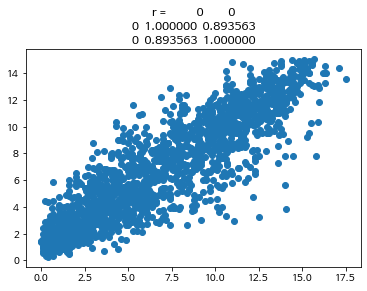

In [ ]:
plt.figure()
plt.title('r = {}'.format(corr))
plt.scatter(y_test,preds)
plt.show

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[05:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,7.050197,0.022000,7.052399,0.051617
1,6.509429,0.022908,6.514085,0.048503
2,6.024350,0.018551,6.033703,0.049348
3,5.623797,0.035131,5.639199,0.046869
4,5.226838,0.041131,5.245641,0.030449


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.322281
Name: test-rmse-mean, dtype: float64


In [ ]:
# import matplotlib.pyplot as plt

# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [40, 10]
# plt.show()

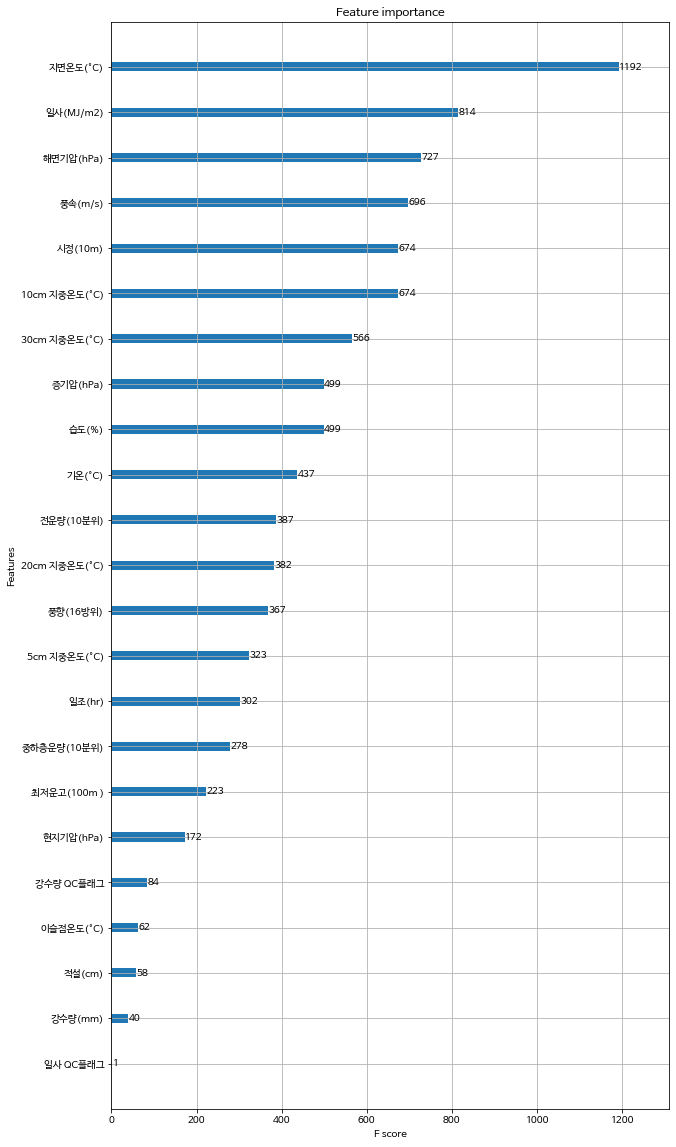

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]

xgb.plot_importance(xg_reg)
plt.show()

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#CatBoost

import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
# from matplotlib import pyplot as pltfrom sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
X_train

,적설(cm),지면온도(°C),해면기압(hPa),현상번호(국내식),3시간신적설(cm),증기압(hPa),운형(운형약어),일사 QC플래그,풍속(m/s),현지기압(hPa),...,습도(%),30cm 지중온도(°C),강수량(mm),풍향 QC플래그,시정(10m),일사(MJ/m2),지면온도 QC플래그,기온 QC플래그,풍향(16방위),지면상태(지면상태코드)
2019-12-27 13:00:00,-0.078155,-0.774833,0.341095,0.0,0.0,-1.087867,0.0,-0.915024,1.419788,0.288065,...,-1.506399,-1.114951,-0.13559,-0.017208,-0.522055,1.374019,-0.027215,-0.024061,1.006465,0.0
2020-01-02 14:00:00,-0.078155,-0.871605,0.494112,0.0,0.0,-0.915681,0.0,-0.915024,0.773505,0.412891,...,-1.100986,-1.331871,-0.13559,-0.017208,-0.373277,1.544038,-0.027215,-0.024061,1.006465,0.0
2021-04-29 13:00:00,-0.078155,1.954140,-0.347483,0.0,0.0,-0.766453,0.0,-0.915024,1.948566,-0.279599,...,-2.317225,0.161047,-0.13559,-0.017208,-0.452315,3.380244,-0.027215,-0.024061,0.629079,0.0
2019-08-15 11:00:00,-0.078155,1.954140,-0.857540,0.0,0.0,1.977046,0.0,-0.915024,0.597246,-0.683799,...,-0.138131,1.398766,-0.13559,-0.017208,2.566954,2.088099,-0.027215,-0.024061,1.006465,0.0
2020-01-01 15:00:00,-0.078155,-1.113535,0.585193,0.0,0.0,-1.053430,0.0,-0.915024,2.124825,0.487193,...,-1.100986,-1.306351,-0.13559,-0.017208,-0.592725,1.294676,-0.027215,-0.024061,1.157419,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07 12:00:00,-0.078155,2.021880,-0.507786,0.0,0.0,1.713027,0.0,-0.915024,-0.401555,-0.410369,...,-0.796927,1.590165,-0.13559,-0.017208,2.954708,3.028871,-0.027215,-0.024061,1.157419,0.0
2021-09-12 14:00:00,-0.078155,1.779950,-0.205395,0.0,0.0,1.093157,0.0,-0.915024,0.127222,-0.163688,...,-0.948957,1.181846,-0.13559,-0.017208,-0.020858,2.813514,-0.027215,-0.024061,-0.880463,0.0
2021-01-06 13:00:00,-0.078155,-1.316756,0.282802,0.0,0.0,-1.099346,0.0,-0.915024,0.362234,0.249428,...,-0.594220,-1.472231,-0.13559,-0.017208,-0.226358,0.886631,-0.027215,-0.024061,1.157419,0.0
2019-05-20 15:00:00,-0.078155,1.083191,-0.289190,0.0,0.0,-0.536871,0.0,-0.915024,2.653602,-0.223130,...,-1.506399,0.122767,-0.13559,-0.017208,-0.058053,2.439472,-0.027215,-0.024061,1.006465,0.0


In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
156:	learn: 2.1668356	test: 2.2607591	best: 2.2607591 (156)	total: 998ms	remaining: 273ms
157:	learn: 2.1648921	test: 2.2593699	best: 2.2593699 (157)	total: 1s	remaining: 267ms
158:	learn: 2.1635493	test: 2.2584584	best: 2.2584584 (158)	total: 1.01s	remaining: 260ms
159:	learn: 2.1615946	test: 2.2573144	best: 2.2573144 (159)	total: 1.01s	remaining: 253ms
160:	learn: 2.1598196	test: 2.2556388	best: 2.2556388 (160)	total: 1.02s	remaining: 247ms
161:	learn: 2.1581957	test: 2.2535630	best: 2.2535630 (161)	total: 1.02s	remaining: 240ms
162:	learn: 2.1566786	test: 2.2524518	best: 2.2524518 (162)	total: 1.03s	remaining: 233ms
163:	learn: 2.1546173	test: 2.2508598	best: 2.2508598 (163)	total: 1.03s	remaining: 227ms
164:	learn: 2.1530508	test: 2.2500752	best: 2.2500752 (164)	total: 1.04s	remaining: 220ms
165:	learn: 2.1510712	test: 2.2482030	best: 2.2482030 (165)	total: 1.04s	remaining: 214ms
166:	learn: 2.1491913	test: 2.2470837	best: 2.2470837 (166)	total: 

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 1.97
R2: 0.80


In [ ]:
# 상관관계 계수를 계산하기 위한 데이터프레임 변경
import pandas as pd
y_test1 = y_test.values
y_test1 = pd.DataFrame(y_test1)
pred = pd.DataFrame(pred)

y_result = pd.concat([y_test1,pred],axis=1)
print(y_result)

         0          0
0     15.2  13.714026
1      9.9  11.426852
2      4.0   7.613395
3     11.4  11.212945
4     12.0  11.086162
...    ...        ...
1785   1.9   3.366679
1786  11.5  11.895037
1787  11.6  12.124877
1788   6.3   4.473687
1789   3.3   3.675747

[1790 rows x 2 columns]


In [ ]:
# 예측값과 실제값의 상관계수 계산
corr = y_result.corr(method = 'pearson')
print(corr)

          0         0
0  1.000000  0.895832
0  0.895832  1.000000


<function matplotlib.pyplot.show(*args, **kw)>

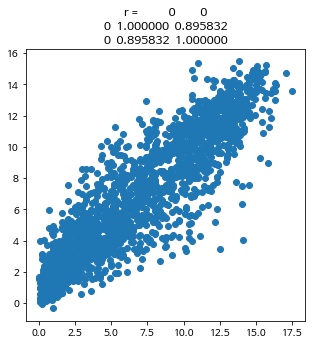

In [ ]:
plt.figure(figsize = (5, 5))
plt.title('r = {}'.format(corr))
plt.scatter(y_test1,pred)
plt.show

Text(0.5, 0, 'CatBoost Feature Importance')

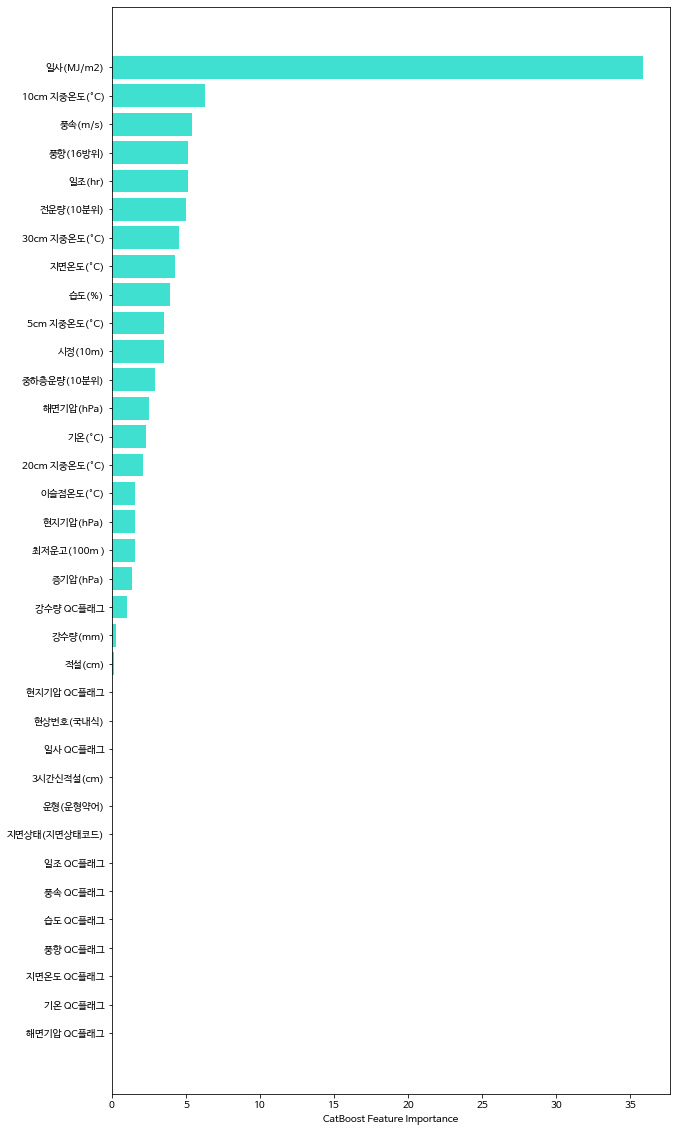

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(data.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [ ]:
##랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.7497


In [ ]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_run, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.1942 ± 0.0344,일사(MJ/m2)
0.0318 ± 0.0060,풍속(m/s)
0.0281 ± 0.0025,일조(hr)
0.0232 ± 0.0023,10cm 지중온도(°C)
0.0102 ± 0.0010,전운량(10분위)
0.0098 ± 0.0012,중하층운량(10분위)
0.0065 ± 0.0009,기온(°C)
0.0044 ± 0.0020,습도(%)
0.0023 ± 0.0005,5cm 지중온도(°C)
0.0013 ± 0.0003,지면온도(°C)


In [ ]:
# train rmse
train_predict = rf_run.predict(X_train)
print("Train_RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )

# validation rmse
test_predict = rf_run.predict(X_test)
print("Test_RMSE':{}".format(math.sqrt(mean_squared_error(test_predict, y_test))) )

Train_RMSE':2.2391398046897995
Test_RMSE':2.314720885269634


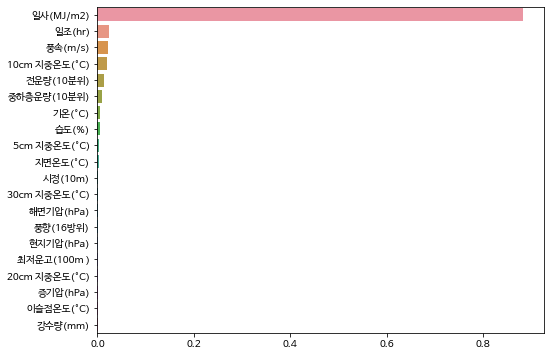

In [ ]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


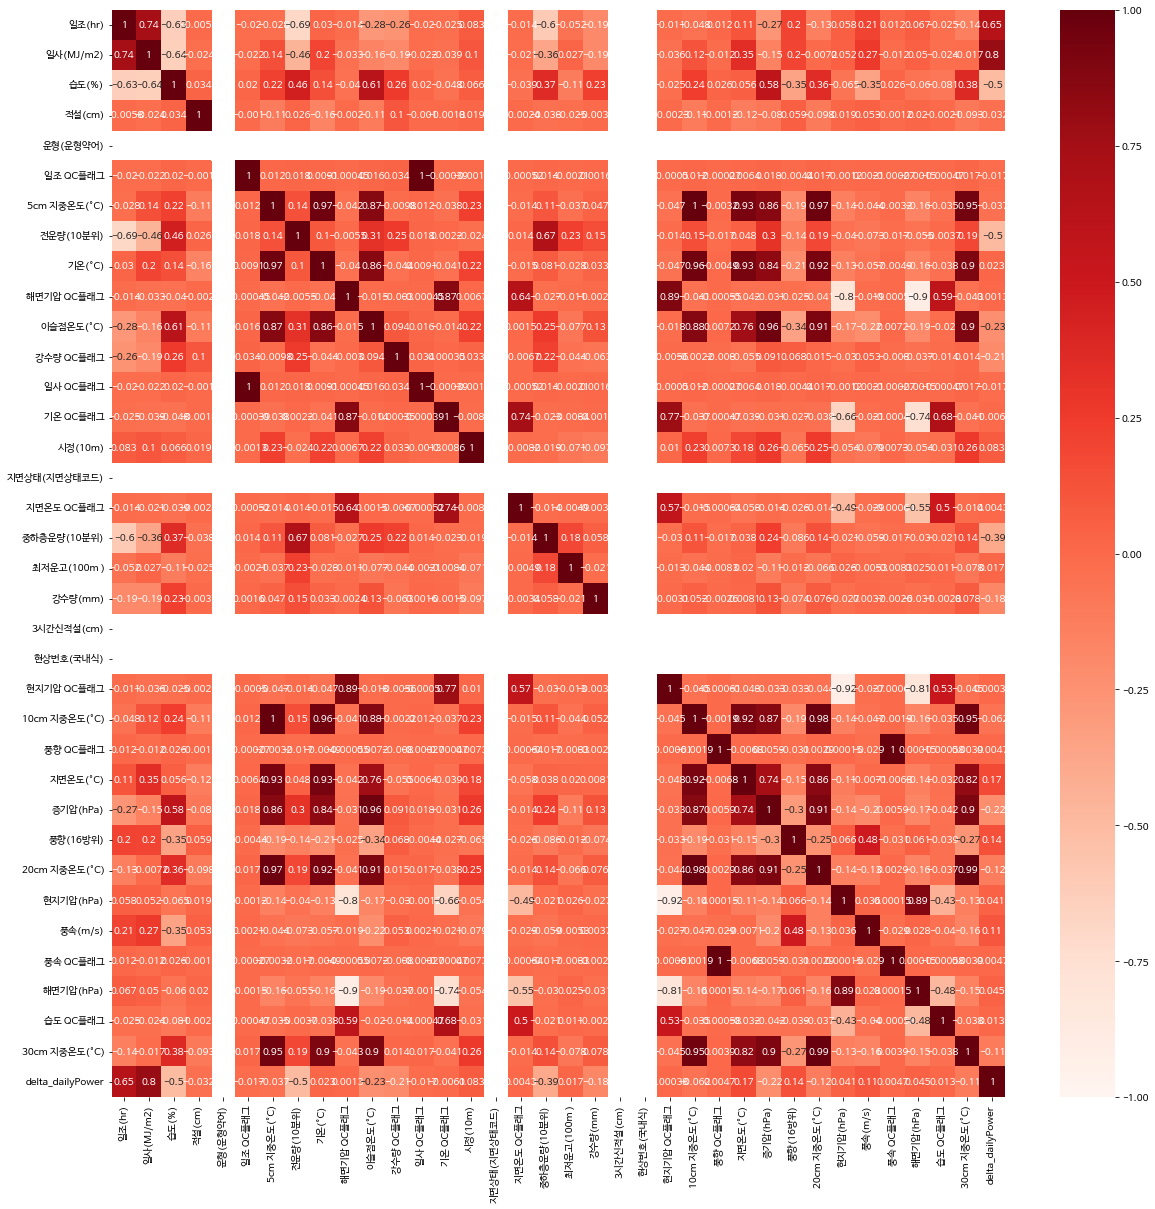

In [ ]:
import seaborn as sb
plt.figure(figsize=(20, 20))
sb.heatmap(data.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )
plt.show()

In [ ]:
##회귀분석
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas as pd
from pandas import read_csv

from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,4.121833e+00,일조(hr)
1,5.345493e+00,일사(MJ/m2)
2,3.375317e+01,습도(%)
3,1.101136e+00,적설(cm)
4,NaN,운형(운형약어)
5,3.534938e+10,일조 QC플래그
6,3.294072e+02,5cm 지중온도(°C)
7,2.731403e+00,전운량(10분위)
8,9.354744e+01,기온(°C)
9,2.580092e+04,해면기압 QC플래그


In [ ]:
# k-fold validation
import keras
from sklearn.metrics import mean_squared_error
import numpy as np
from keras import losses
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

k = 4
num_val_samples = len(X_train) // k

all_mae = []
all_mape = []
all_rmse = []


for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
        X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
    print(partial_train_data.shape)
    print(partial_train_targets.shape)
    print(val_data.shape)
    print(val_targets.shape)
    # 케라스 모델 구성(컴파일 포함)
    model = sm.OLS(partial_train_targets,partial_train_data)
    result = model.fit()

    # model.fit(partial_train_data, partial_train_targets,
              # epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가

    y_hat = result.predict(val_data)
    y_hat = y_hat.values
    # y_hat = relu(y_hat)
    y_hat = y_hat.reshape(len(val_data),1)
    # y_hat = scaler.inverse_transform(y_hat)
    # val_targets = scaler.inverse_transform(val_targets)
    # val_mape = mape(val_targets, y_hat)
    # val_mae1 = mae(val_targets, y_hat)
    val_mae = np.mean(keras.losses.mean_absolute_error(val_targets, y_hat))
    val_mape = np.mean(keras.losses.mean_absolute_percentage_error(val_targets, y_hat))
    val_rmse = mean_squared_error(val_targets, y_hat)**0.5
    all_mae.append(val_mae)
    all_mape.append(val_mape)
    all_rmse.append(val_rmse)

처리중인 폴드 # 0
(5370, 35)
(5370,)
(1789, 35)
(1789,)
처리중인 폴드 # 1
(5370, 35)
(5370,)
(1789, 35)
(1789,)
처리중인 폴드 # 2
(5370, 35)
(5370,)
(1789, 35)
(1789,)
처리중인 폴드 # 3
(5370, 35)
(5370,)
(1789, 35)
(1789,)


In [ ]:
# 성능 평가
print(all_mae)
print(all_rmse)

# 성능 평균
print('Val MAE: %.3f' % (np.mean(all_mae)))
print('Val RMSE: %.3f' % (np.mean(all_rmse)))

[4.718043249021122, 4.797085569630023, 4.700021958743908, 4.714292791788895]
[2.229342052159007, 2.15878818069057, 2.1884784360000453, 2.1494523356784234]
Val MAE: 4.732
Val RMSE: 2.182


In [ ]:
# multiple linear regression
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# (a) 다중회귀 모형 적합 y = bo+b1*x1+b2*x2+e

x_1 = sm.add_constant(X, has_constant='add')
model = sm.OLS(y_train,X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       delta_dailyPower   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     755.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        04:39:14   Log-Likelihood:                -15702.
No. Observations:                7159   AIC:                         3.146e+04
Df Residuals:                    7129   BIC:                         3.167e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
일조(hr)           -0.0888      0.048     -1.851

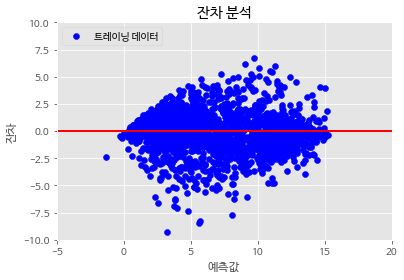

In [ ]:
plt.scatter(pred, pred-y_test1, c='blue', marker='o', label = '트레이닝 데이터')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-5, 20])
plt.ylim([-10, 10])
plt.title('잔차 분석')
plt.legend(loc=2)
plt.show()

In [ ]:
# lightgbm을 구현하여 shap value를 예측할 것
# ligthgbm 구현

# library
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = X_train, label = y_train) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(X_test) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, y_test)))) # RMSE

RMSE: 1.9742981642182664


In [ ]:
X_test.columns

Index(['일조(hr)', '일사(MJ/m2)', '습도(%)', '적설(cm)', '운형(운형약어)', '일조 QC플래그',
       '5cm 지중온도(°C)', '전운량(10분위)', '기온(°C)', '해면기압 QC플래그', '이슬점온도(°C)',
       '강수량 QC플래그', '일사 QC플래그', '기온 QC플래그', '시정(10m)', '지면상태(지면상태코드)',
       '지면온도 QC플래그', '중하층운량(10분위)', '최저운고(100m )', '강수량(mm)', '3시간신적설(cm)',
       '현상번호(국내식)', '현지기압 QC플래그', '10cm 지중온도(°C)', '풍향 QC플래그', '지면온도(°C)',
       '증기압(hPa)', '풍향(16방위)', '20cm 지중온도(°C)', '현지기압(hPa)', '풍속(m/s)',
       '풍속 QC플래그', '해면기압(hPa)', '습도 QC플래그', '30cm 지중온도(°C)'],
      dtype='object')

In [ ]:
y_test

2019-05-02 13:00:00    15.2
2019-12-28 13:00:00     9.9
2021-03-31 16:00:00     4.0
2019-03-19 10:00:00    11.4
2019-06-21 10:00:00    12.0
                       ... 
2019-09-26 17:00:00     1.9
2021-07-16 10:00:00    11.5
2019-08-18 13:00:00    11.6
2019-04-30 09:00:00     6.3
2021-07-23 07:00:00     3.3
Name: delta_dailyPower, Length: 1790, dtype: float64

In [ ]:
# shap value를 이용하여 각 변수의 영향도 파악

# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산

In [ ]:
# version 확인
import skimage
skimage.__version__

'0.18.3'

In [ ]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

In [ ]:
# 전체 검증 데이터 셋에 대해서 적용
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

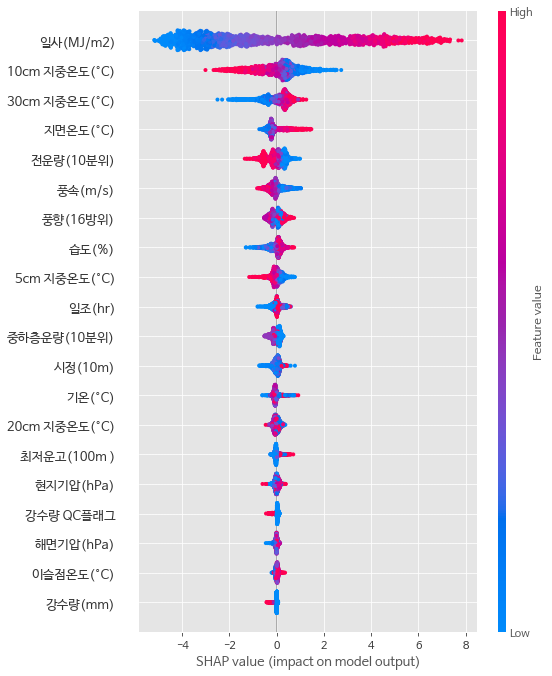

In [ ]:
# summary
shap.summary_plot(shap_values, X_test)

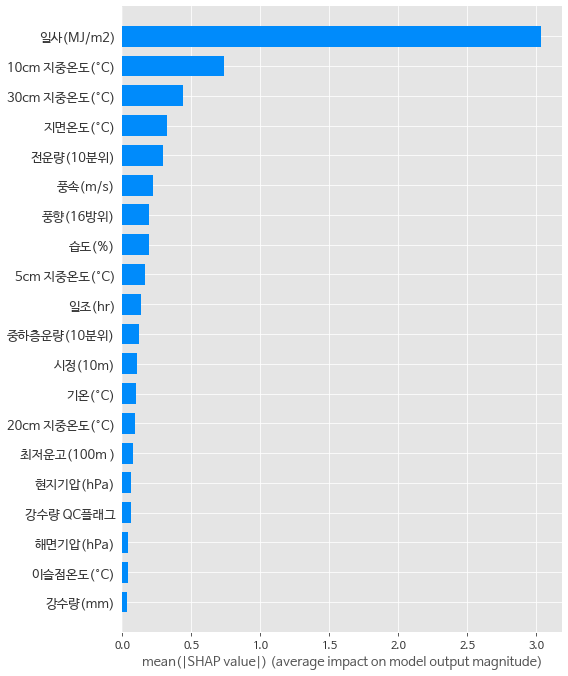

In [ ]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_test, plot_type = "bar")

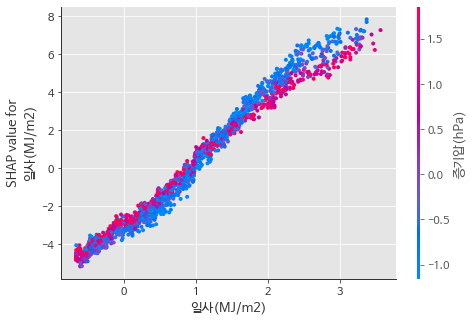

In [ ]:
 # 변수 간의 shap value 파악
shap.dependence_plot("일사(MJ/m2)", shap_values, X_test)